In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline
data = pd.read_csv("kc_house_data.csv")
print(data.head(5))

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

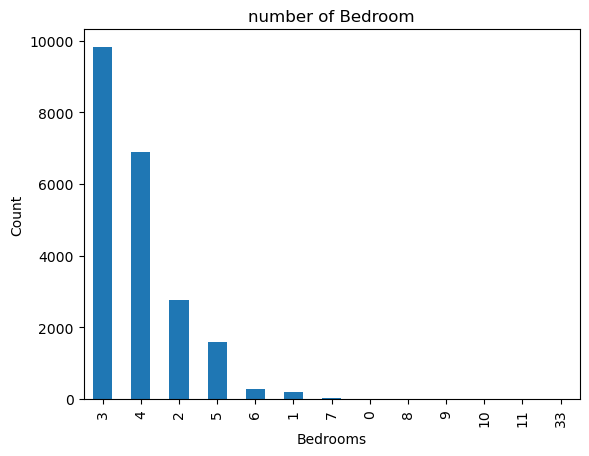

In [8]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

<Figure size 1000x1000 with 0 Axes>

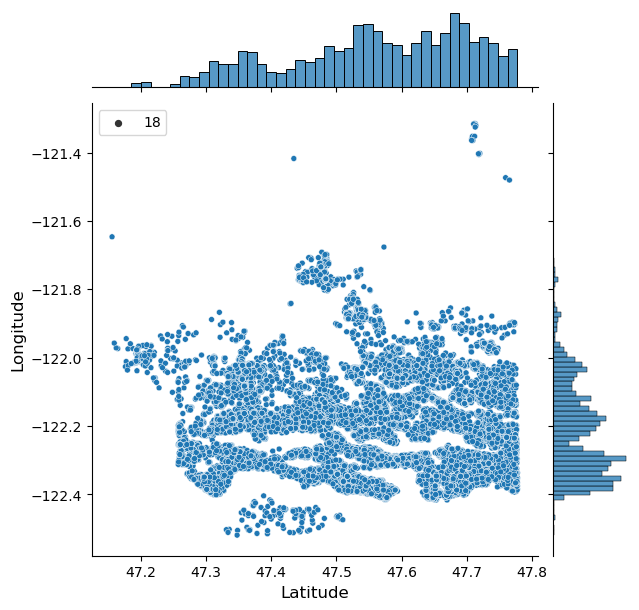

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [13]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=18)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine


Text(0.5, 1.0, 'Price vs Square Feet')

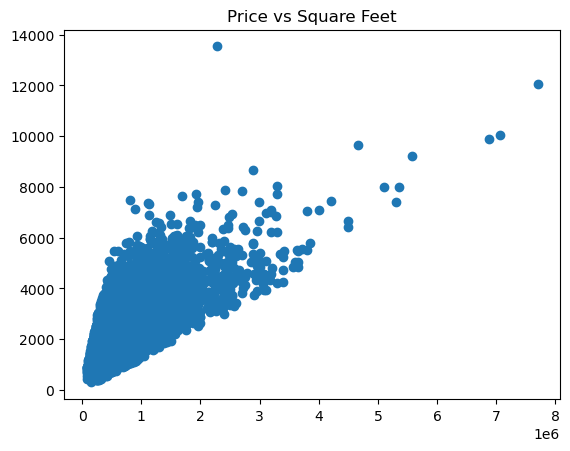

In [14]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")


Text(0.5, 1.0, 'Price vs Location of the area')

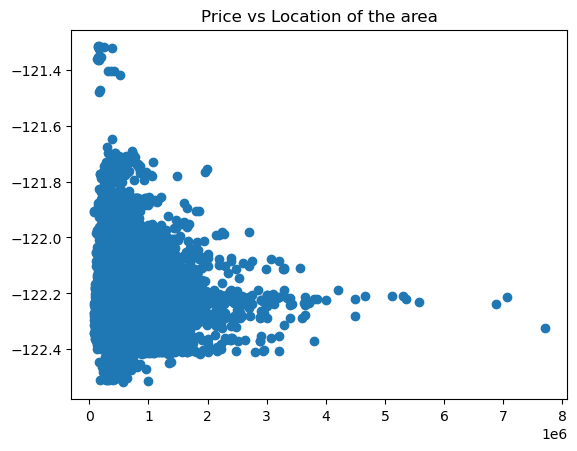

In [16]:
plt.scatter(data.price,data.long)
plt.title("Price vs Location of the area")

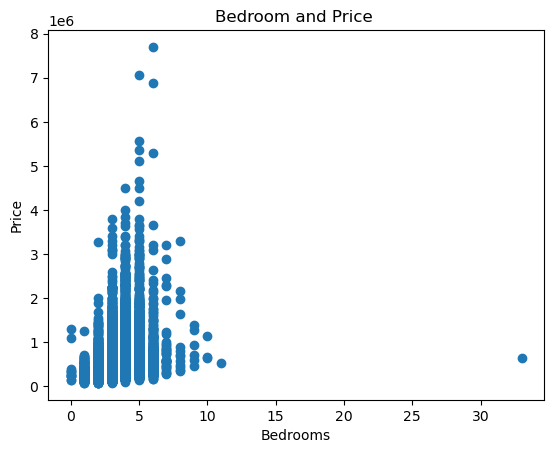

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [18]:
plt.scatter(data.bedrooms, data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

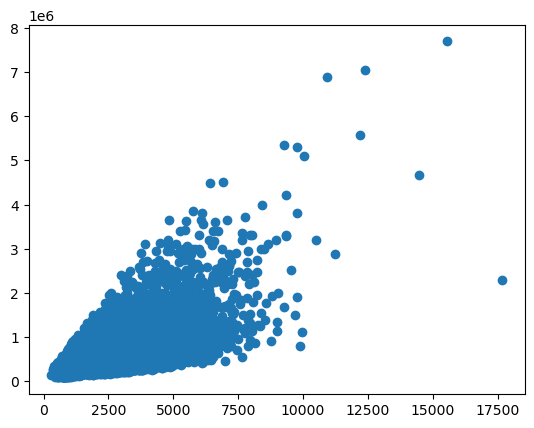

In [19]:
plt.scatter((data['sqft_living']+data['sqft_basement']), data['price'])

Text(0.5, 1.0, 'waterfront vs Price (e no waterfront)')

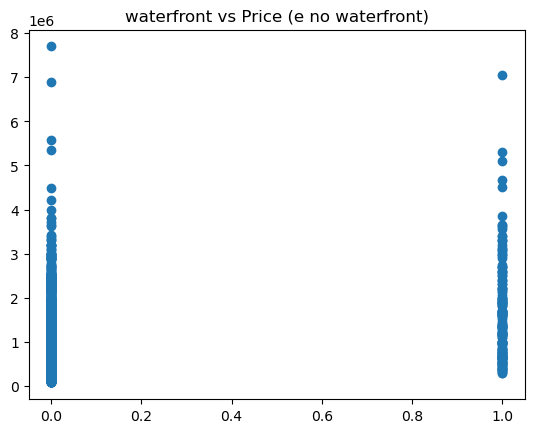

In [21]:
plt.scatter(data.waterfront, data.price) 
plt.title("waterfront vs Price (e no waterfront)")

In [67]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'], axis=1)


       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0         0         3       1.00         1180      5650     1.0           0   
1         0         3       2.25         2570      7242     2.0           0   
2         0         2       1.00          770     10000     1.0           0   
3         0         4       3.00         1960      5000     1.0           0   
4         0         3       2.00         1680      8080     1.0           0   
...     ...       ...        ...          ...       ...     ...         ...   
21608     0         3       2.50         1530      1131     3.0           0   
21609     0         4       2.50         2310      5813     2.0           0   
21610     0         2       0.75         1020      1350     2.0           0   
21611     0         3       2.50         1600      2388     2.0           0   
21612     0         2       0.75         1020      1076     2.0           0   

       view  condition  grade  sqft_above  sqft_bas

In [27]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test= train_test_split(train1, labels, test_size = 0.10, random_state =2)
reg.fit(x_train,y_train)


LinearRegression()

In [46]:
reg.score(x_test,y_test)

0.7320342760357688

In [52]:
from sklearn import ensemble
clf= ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)

In [53]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [54]:
clf.score(x_test,y_test)

0.9183422547733937